# Project Purpose

1. Uncover key insights from a comprehensive beer dataset provided by Evolent Health
2. Leveraging data analysis and science techniques, we will explore various aspects of the dataset to answer questions about consumer preference, brewery strengths and user reviews.

## Exploratory Questions

### Consumer Insights

1. How many unique consumers make up the 528,870 reviews?
2. We can use the .nunique() to understand the unique number of customers making up the dataset
3. What is the percentage of reviews per unique customer?
4. Are there consumers with more than 500 beers reviewed? If so, how many?
5. What % of the consumer base?
6. From a review volume perspective, what % of reviews do the top consumers make up? (Top 100, 500, 1000)
7. On average, how many days have consumers been actively reviewing? Look at first and last review date

### Beer Insights

1. Rank the top 3 breweries which produce the strongest beers.
2. Which year did beers enjoy the highest ratings?
3. Based on the users' ratings, which factors are important among taste, aroma, appearance, and palette?
4. If you were to recommend 3 beers to your friends based on this data, which ones would you recommend?
5. Which beer style seems to be the favourite based on the reviews written by users? How does written reviews compare to overall review score for the beer style?

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# reading in beer_reviews_data and storing it under variable df
df = pd.read_csv('data/beer_reviews_data.csv')

# displaying a random sample of the dataset utilizing the .sample() function
df.sample(n = 10, random_state = 42)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
116087,5.8,234,76,Hacker-Pschorr Oktoberfest-M�rzen,M�rzen / Oktoberfest,4.0,3.5,4.0,4.5,divineaudio,4.5,pint glass. a - pours a clear amber liquid wit...,1317698982
218685,8.7,1446,158,Hibernation Ale,Old Ale,4.5,4.5,4.0,3.5,Cylinsier,3.0,From a 12 oz. Pours a maple syrup brown that g...,1262818901
63854,11.0,74491,16866,4 Calling Birds,Belgian Strong Dark Ale,4.0,3.0,3.0,3.5,womencantsail,3.0,On-tap at the Bruery Almost black with a dense...,1321823635
234370,5.0,43341,1628,Southampton Altbier,Altbier,2.5,4.0,4.0,3.5,DerekP,3.5,"According to the label, a ""Dusseldorf-Style Br...",1280711924
501494,9.0,40187,132,XS Imperial Red,American Amber / Red Ale,4.0,4.0,3.0,3.0,Gueuzedude,3.5,"Sampled on Tap at 1702, Tucson AZ; August 2008...",1219009004
246729,9.0,2512,215,Chimay Grande R�serve (Blue),Belgian Strong Dark Ale,3.5,5.0,4.5,4.0,mentor,4.0,Three finger dead tan head over a cloudy dark ...,1195591313
489422,5.3,353,132,Mocha Porter,American Porter,4.5,4.0,4.0,4.0,Stubbie1,4.0,"Appearance: Poured black, finished with a nice...",1041482821
243405,11.0,7975,48,Bi�re Du Boucanier Golden,Belgian Strong Pale Ale,3.5,4.5,3.0,3.0,Infamous7100,3.5,"Consumed this from a snifter, as you should wi...",1239405638
4124,8.4,52211,14879,Frog's Hollow Double Pumpkin Ale,Pumpkin Ale,4.0,3.5,3.0,3.5,Huhzubendah,3.5,Bottle shared by Chaney. Thanks Brandon! A: Th...,1286322675
479954,5.9,17300,9529,Pale Ale,American Pale Ale (APA),4.5,4.0,3.5,4.0,belgaridub,4.5,This came to the table a dark red-brown color....,1147897647


In [2]:
# understanding the data landscape of the dataset (dtype, non-null values and memory usage)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528751 non-null  object 
 12  review_time         528870 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


In [3]:
# looking at descriptive statistics for all numerical columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
beer_ABV,508590.0,7.017442e+00,2.204460e+00,1.000000e-02,5.300000e+00,6.500000e+00,8.500000e+00,5.770000e+01
beer_beerId,528870.0,2.209847e+04,2.215828e+04,3.000000e+00,1.745000e+03,1.436800e+04,4.052800e+04,7.731000e+04
beer_brewerId,528870.0,2.598423e+03,5.281805e+03,1.000000e+00,1.320000e+02,3.940000e+02,1.475000e+03,2.798000e+04
review_appearance,528870.0,3.864522e+00,6.040104e-01,0.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_palette,528870.0,3.758926e+00,6.853349e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_overall,528870.0,3.833197e+00,7.099618e-01,0.000000e+00,3.500000e+00,4.000000e+00,4.500000e+00,5.000000e+00
review_taste,528870.0,3.765993e+00,6.690176e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_aroma,528870.0,3.817350e+00,7.189030e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.500000e+00,5.000000e+00
review_time,528870.0,1.224885e+09,7.605600e+07,8.843904e+08,1.174613e+09,1.240366e+09,1.288560e+09,1.326277e+09


In [4]:
# checking for null values
df.isnull().sum()

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text             119
review_time               0
dtype: int64

In [5]:
# lastly understanding the dimensionality of the dataset
df.shape

(528870, 13)

### Dimensionality Results

+ This dataset contains 528,870 beer reviews
+ it has 13 columns 

In [6]:
# converting review_time column to datetime format, and formatting date (YYYY-MM-DD) format
# unit = s indicates that the timestamps are in seconds
df['review_time'] = pd.to_datetime(df['review_time'], unit = 's').dt.date

# double checking to ensure the timestamp conversion was successful
df.sample(n = 10, random_state = 42)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
116087,5.8,234,76,Hacker-Pschorr Oktoberfest-M�rzen,M�rzen / Oktoberfest,4.0,3.5,4.0,4.5,divineaudio,4.5,pint glass. a - pours a clear amber liquid wit...,2011-10-04
218685,8.7,1446,158,Hibernation Ale,Old Ale,4.5,4.5,4.0,3.5,Cylinsier,3.0,From a 12 oz. Pours a maple syrup brown that g...,2010-01-06
63854,11.0,74491,16866,4 Calling Birds,Belgian Strong Dark Ale,4.0,3.0,3.0,3.5,womencantsail,3.0,On-tap at the Bruery Almost black with a dense...,2011-11-20
234370,5.0,43341,1628,Southampton Altbier,Altbier,2.5,4.0,4.0,3.5,DerekP,3.5,"According to the label, a ""Dusseldorf-Style Br...",2010-08-02
501494,9.0,40187,132,XS Imperial Red,American Amber / Red Ale,4.0,4.0,3.0,3.0,Gueuzedude,3.5,"Sampled on Tap at 1702, Tucson AZ; August 2008...",2008-08-17
246729,9.0,2512,215,Chimay Grande R�serve (Blue),Belgian Strong Dark Ale,3.5,5.0,4.5,4.0,mentor,4.0,Three finger dead tan head over a cloudy dark ...,2007-11-20
489422,5.3,353,132,Mocha Porter,American Porter,4.5,4.0,4.0,4.0,Stubbie1,4.0,"Appearance: Poured black, finished with a nice...",2003-01-02
243405,11.0,7975,48,Bi�re Du Boucanier Golden,Belgian Strong Pale Ale,3.5,4.5,3.0,3.0,Infamous7100,3.5,"Consumed this from a snifter, as you should wi...",2009-04-10
4124,8.4,52211,14879,Frog's Hollow Double Pumpkin Ale,Pumpkin Ale,4.0,3.5,3.0,3.5,Huhzubendah,3.5,Bottle shared by Chaney. Thanks Brandon! A: Th...,2010-10-05
479954,5.9,17300,9529,Pale Ale,American Pale Ale (APA),4.5,4.0,3.5,4.0,belgaridub,4.5,This came to the table a dark red-brown color....,2006-05-17


# Exploratory Questions

### Consumer Questions

+ How many unique consumers make up the 528,870 reviews?
+ We can use the .nunique() to understand the unique number of customers making up the dataset
+ What is the percentage of reviews per unique customer?
+ Let's answer this in the cell below

In [7]:
# using the .nunique() function on the review_profileName column to understand the unique number of users making up the dataset
# storing it under users
consumers = df['review_profileName'].nunique()

# storing the total number of reviews in a variable for easier readability
total_reviews = len(df)

# calculating the numbers of reviews per customer
reviews_per_consumer = round(total_reviews / consumers, 2)

# printing short statement with the answer
print(f"The dataset is made up of {consumers} unique consumers. The average reviews per consumer is {reviews_per_consumer}. There are some very dedicated beer consumers!")

The dataset is made up of 22800 unique consumers. The average reviews per consumer is 23.2. There are some very dedicated beer consumers!


### Let's take a look at the top customers and the total number of reviews

+ Are there consumers with more than 500 beers reviewed? If so, how many?
+ What % of the consumer base?
+ From a review volume perspective, what % of reviews do the top consumers make up? (Top 100, 500, 1000, 5000)
+ On average, how many days have consumers been actively reviewing? Look at first and last review date

# Building the Dataset

### Step One: Create a list of unique user_id's and get their total reviews

+ Group by profile name and count the total times they left a review
+ Sort the values descending to see the amount of times consumers left reviews

In [8]:
# grouping a dataframe by the user id and counting the total times they reviewed a beer
unique_user_ids = df.groupby('review_profileName')['beer_beerId'].count().reset_index().rename({"beer_beerId" : "total_reviews"}, axis = 1).sort_values(by = 'total_reviews', ascending = False)

# displaying the dataframe
unique_user_ids

,review_profileName,total_reviews
18434,northyorksammy,1858
17597,mikesgroove,1403
1672,BuckeyeNation,1298
22470,womencantsail,1238
6685,Phyl21ca,1164
...,...,...
16887,lucasj82,1
9754,aphineday,1
9755,aphor,1
16884,ltwhiskers,1


### Step Two: Getting each user's first and last review date

+ Group by profile name and utilize the .min() and .max() to get their first and last review dates
+ Calculate the total days in between their first and last dates

In [9]:
# grouping the dataframe by unique user ids and calling on the earlist and latest review date by user id
user_review_dates = df.groupby('review_profileName')['review_time'].agg(['min', 'max']).reset_index()

# calculating the difference in days from the earliest review date to the latest
user_review_dates['total_days_reviewing'] = user_review_dates['max'] - user_review_dates['min']

# changing the datatype on the total days leaving reviews from timedelta to days
user_review_dates['total_days_reviewing'] = user_review_dates['total_days_reviewing'].dt.days

# displaying the dataframe to ensure it worked
user_review_dates

,review_profileName,min,max,total_days_reviewing
0,0110x011,2008-03-18,2009-08-25,525
1,03SVTCobra,2007-11-26,2007-11-29,3
2,04101Brewer,2011-01-26,2011-01-26,0
3,05Harley,2009-09-15,2011-11-27,803
4,0runkp0s,2010-12-29,2010-12-29,0
...,...,...,...,...
22795,zymrgy,2008-08-16,2009-02-22,190
22796,zymurgy4all,2005-12-31,2009-04-23,1209
22797,zymurgywhiz,2009-01-08,2009-01-08,0
22798,zythus,2009-03-21,2009-05-31,71


### Step Three: Merge both datasets on the profileName

+ Use the [.merge()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) function to perform a left join on the profileName
+ The final dataset will contain the profile name, earliest and latest review date and the total days in between
+ Use the [.rank()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rank.html) function to rank consumers based on the total number of reviews left with the highest total descending

In [10]:
# merging both user_ids dataset and the user_review_dates for a centralized dataset with all of the information
user_df = pd.merge(unique_user_ids, user_review_dates, how = 'left', on = 'review_profileName')

# adding a column ranking the 
user_df['rank'] = user_df['total_reviews'].rank(method = 'dense', ascending = False).astype(int)

# displaying the merged dataset
user_df.head(10)

,review_profileName,total_reviews,min,max,total_days_reviewing,rank
0,northyorksammy,1858,2003-11-30,2012-01-09,2962,1
1,mikesgroove,1403,2006-11-06,2011-12-15,1865,2
2,BuckeyeNation,1298,2003-12-03,2011-05-05,2710,3
3,womencantsail,1238,2009-06-22,2012-01-09,931,4
4,Phyl21ca,1164,2003-07-14,2012-01-10,3102,5
5,ChainGangGuy,1155,2005-11-04,2012-01-08,2256,6
6,Thorpe429,1042,2009-02-16,2012-01-07,1055,7
7,brentk56,1026,2004-07-14,2012-01-07,2733,8
8,NeroFiddled,1012,2002-07-15,2011-12-21,3446,9
9,feloniousmonk,1008,2002-11-19,2011-12-24,3322,10


### Step Four: Data Manipulation for Insights

+ Using the rank column, understand the % of total reviews that the top 100, 500, 1000, 5000 consumers make up
+ On average, how many reviews do these consumers average and what is the average amount of days they have been reviewing?

In [11]:
# filtering for the top 100 consumers with the most reviews
# using the rank column, filtering by for the top 100
top_100_reviewers = user_df[user_df['rank'] <= 100]

# now that we've successfully filtered for the top 100 consumers, let's add up the total reviews
top_100_reviewers_total = top_100_reviewers['total_reviews'].sum()

# let's also understand on average how many beer reviews each has left
top_100_reviewers_avg = round(top_100_reviewers['total_reviews'].mean(), 0)

# calculating the total percentage that the 100 consumers make up
top_100_perc_reviews = round(top_100_reviewers_total / len(df) * 100, 2)

# printing out the statement that will give the answers of the percentage the top 100 consumers make up and the average number of reviews per consumer
print(f"The top 100 consumers make up {top_100_perc_reviews}% of total reviews and each consumer averages about {top_100_reviewers_avg} beer reviews")

The top 100 consumers make up 14.39% of total reviews and each consumer averages about 698.0 beer reviews


### Question 1: Which breweries produce the strongest beer?

#### Approach

+ In order to measure the strongest beers, we need to calculate the average ABV (Alcohol by Volume)
+ Therefore, group by the brewer ID, calculate the mean beer ABV and sort it in descending order
+ Using the .rank() function, then we can filter out for the topm 3 strongest Breweries

In [12]:
# grouping the dataset by brewer_abv and calculating the average alcohol by volume
df_abv = df.groupby('beer_brewerId')['beer_ABV'].mean().reset_index().sort_values(by = 'beer_ABV', ascending = False)

# rounding the average to the second decimal point and filling any null values with 0 for cleaner data
df_abv['beer_ABV'] = round(df_abv['beer_ABV'], 2).fillna(0)

# renaming the column for better readability
df_abv = df_abv.rename({"beer_ABV" : "avg_ABV"}, axis = 1)

# using the rank function to determine the top 3 breweries with the strongest beer
df_abv['rank'] = df_abv['avg_ABV'].rank(method = 'dense', ascending = False)

# displaying the dataset and filtering out for the top 3
df_abv[df_abv['rank'] <= 3]

,beer_brewerId,avg_ABV,rank
784,6513,19.23,1.0
175,736,13.75,2.0
1644,24215,12.47,3.0


### Telling a Story with the data

+ Let's look at the distribution of Alcohol by Volume using visuals
+ Beer_brewerId '6513' has a much higher average than the second and third highest averages
+ What is the median? Since the distribution seems to fairly spread out, median might be more effective than average
+ How many breweries are below the median?
+ On the cell below, let's implement a boxplot 

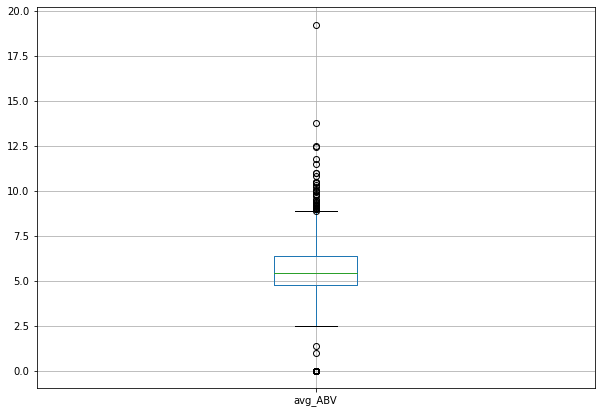

In [13]:
# creating the boxplot utilizing the average ABV by brewery
df_abv_box = df_abv.boxplot(column = 'avg_ABV', figsize = (10, 7))

### Boxplot Takeaways

+ Brewery ID '6513' is on a league of its own with an average of 19.2%
+ The median Alcohol by Volume is around 5.5 to 6%
+ There is a small amount of breweries that have a low Alcohol by Volume average, and some that are 0 because the average was null


### Question 2: Which year did beers enjoy the highest ratings?

#### Approach

+ Utilize the .to_datetime() function to extract the year from the ['review_time'] column
+ The timestamp is in [UNIX format](https://kb.narrative.io/what-is-unix-time.html) - Which is a time system for representing a point in time
+ It is the number of seconds that have elapsed since January 1st,1970 00:00:00 UTC
+ This means that when we convert the data using the to_datetime() function, the unit must be seconds instead of nanoseconds
+ Once we have the year, the data can be aggregated by year and calculate the average for highest ratings

In [14]:
# adding a new column to the dataframe with the year the review was placed
df['review_year'] = pd.to_datetime(df['review_time']).dt.year

In [15]:
# getting a better understanding of the distribution of reviews by year
review_counts = df.groupby('review_year')['review_time'].count().reset_index().rename({"review_time" : "review_counts"}, axis = 1)

In [16]:
# aggregating ratings grouped by year and the average review rating
df_review_year = df.groupby('review_year')['review_overall'].mean().reset_index().rename({"review_overall" : "avg_review_rating"}, axis = 1)

# rounding the review rating to the second nearest decimal
df_review_year['avg_review_rating'] = round(df_review_year['avg_review_rating'], 2)

# displaying the graph
df_review_year

,review_year,avg_review_rating
0,1998,3.89
1,1999,4.00
2,2000,4.18
3,2001,3.93
4,2002,3.80
5,2003,3.75
6,2004,3.79
7,2005,3.83
8,2006,3.80
9,2007,3.81


In [17]:
# merging the counts and the average for better visualization
df_review_year = pd.merge(df_review_year, review_counts, how = 'left', on = 'review_year')

# displaying the table after the join, now has the total reviews and the average
df_review_year

,review_year,avg_review_rating,review_counts
0,1998,3.89,23
1,1999,4.00,25
2,2000,4.18,33
3,2001,3.93,602
4,2002,3.80,7581
5,2003,3.75,18187
6,2004,3.79,22905
7,2005,3.83,29433
8,2006,3.80,43083
9,2007,3.81,46514


### Key takeaways from the data above

+ Despite having the highest average, year 2000 only received 33 reviews in total
+ To add additional context, 2011 received over 100,000 reviews alone
+ 1998 and 1999 also had very low review numbers, but at the years progress, the counts increase drastically
+ Years 1998 to 2001 average the highest ratings, however, based on the distribution of reviews it could be labelled at not enough data to draw conclusions

### Next Steps

+ Create a visualization that demonstrates average rating per year, while also including the total amount of reviews

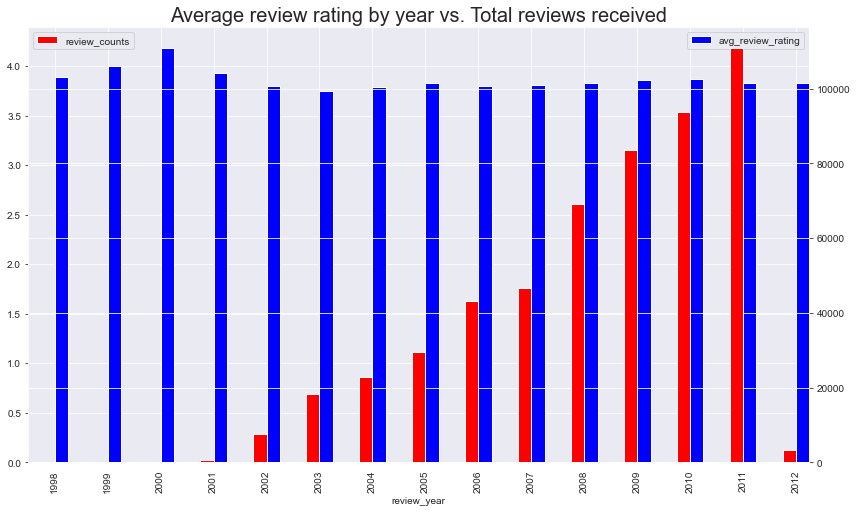

In [18]:
# setting plot style to dark grid
sns.set_style('darkgrid')

# defining font sizes for the plot elements
fontsize = 20
axfont = 12

# creating a new figure with a size of 14 x 8 
fig, ax = plt.subplots(figsize = (14, 8))

# setting up second y axis to plot review counts
ax2 = ax.twinx()

# plotting the first axis, which is the average review ratings and setting the bar colour to blue
df_review_year.plot(x = 'review_year', y = 'avg_review_rating', kind = 'bar', color = 'blue', ax = ax, position = 0, width = 0.25)

# plotting the secondary axis, which is the review counts and setting the bar colour to red
df_review_year.plot(x = 'review_year', y = 'review_counts', kind = 'bar', color = 'red', ax = ax2, position = 1, width = 0.25)

# adding a title to the barchart, and increasing the title to font 20
plt.title('Average review rating by year vs. Total reviews received', fontdict = {'fontsize' : fontsize})
                    
# displaying the visual    
plt.show();

### Question 3: Based on the users' ratings, which factors are important among taste, aroma, appearance, and palette?

#### Approach

+ In order to determine the importance between the factors listed and the users' overall rating, we need to calculator correlations between them
+ We can do so by grouping by beer_id, and calculate the mean of taste, aroma, appearance, palette and overall review
+ After that information is created, we can use the .corr() function to see what factors have greater importance

In [19]:
# creating a dataframe grouprd by beer_id and getting the average for taste, aroma, appearance, palette and overall rating to emable correlation
df_corr = df.groupby('beer_beerId')[['review_taste', 'review_aroma', 'review_appearance', 'review_palette', 'review_overall']].mean()

# rounding the columns to the second nearest decimal
df_corr[['review_taste', 'review_aroma', 'review_appearance', 'review_palette', 'review_overall']] = round(df_corr[['review_taste', 'review_aroma', 'review_appearance', 'review_palette', 'review_overall']], 2)

# displaying the dataframe
df_corr

,review_taste,review_aroma,review_appearance,review_palette,review_overall
beer_beerId,,,,,
3,4.17,4.17,3.83,4.00,4.17
4,3.70,3.45,3.95,3.80,3.70
5,3.32,3.34,3.49,3.21,3.55
6,3.51,3.65,3.84,3.52,3.71
7,3.11,3.10,3.25,3.18,3.27
...,...,...,...,...,...
77302,3.50,3.50,3.00,3.00,3.50
77303,5.00,4.50,4.50,4.50,5.00
77305,3.50,4.00,4.00,4.00,4.00


### Correlations between factors

+ In order to perform and understand correlation between factors, we can use the .corr() function

### What is the .corr() function and what does it do?

+ At it's core, the [.corr()](https://www.geeksforgeeks.org/python-pandas-dataframe-corr/) is used to find the pairwise correlation of all columns in the Pandas Dataframe
+ NaN or Null Values are excluded
+ Using seaborn, creat a heatmap visual to get an illustration of correlations by factor and their importance

In [20]:
# using the .corr() function on the df_corr dataframe
round(df_corr.corr(), 2)

,review_taste,review_aroma,review_appearance,review_palette,review_overall
review_taste,1.00,0.82,0.66,0.74,0.81
review_aroma,0.82,1.00,0.64,0.81,0.87
review_appearance,0.66,0.64,1.00,0.65,0.61
review_palette,0.74,0.81,0.65,1.00,0.75
review_overall,0.81,0.87,0.61,0.75,1.00


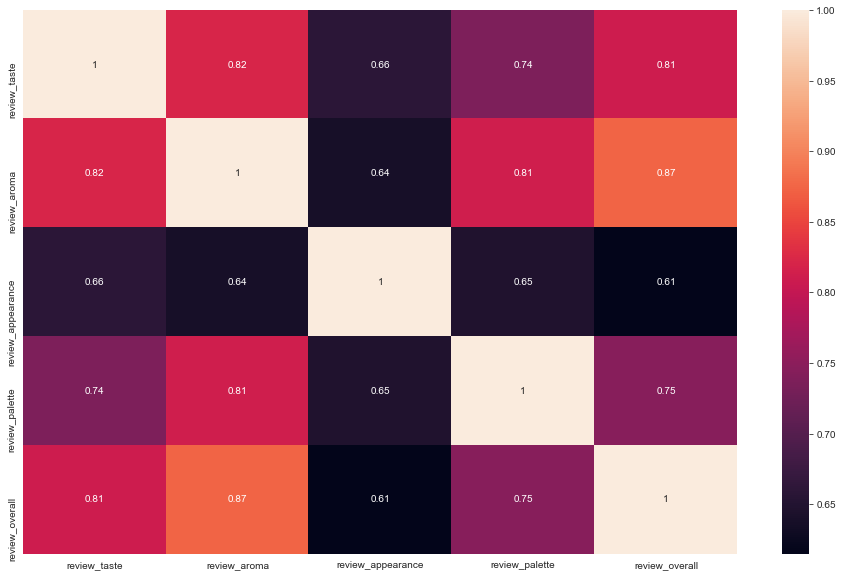

In [21]:
# importing heatmop from the seaborn library
from seaborn import heatmap

# creating a new figure with a size of 16 x 10
fig, ax = plt.subplots(figsize = (16, 10))

# displaying the heatmap visual and setting the annot to True so it displays the numbers
heat_map = heatmap(data = df_corr.corr(), annot = True, ax = ax)

### What does the heatmap tell us?

+ Aroma is the most important factor when it comes to overall review rating
+ Taste is the second most important factor

### Question 4: If you were to recommend 3 beers to your friends based on this data, which ones would you recommend?

#### Approach

+ I like to read reviews before purchasing anything, and I would do the same for my friends as well
+ So how to approach this?
+ Recommend beers that are reviewed consistently, and have a high probability of being highly rated
+ Therefore, we can aggregate the data by beer_id, calculate the average review grade, and the total number of times a beer has been reviewed
+ From there, sort the data by the average review score, but it is important to keep in mind the amount of review a beer has also received
+ For example, if the average review score is 5 but it has only received 1 review, making is subjective. Ideally, we want a higher amount of reviews

In [22]:
# creating a new dataframe grouped by beer_id and aggregating the avg review grade and the total number of times a beer has been reviewed
recommend_df = df.groupby('beer_beerId')['review_overall'].agg(['count', 'mean']).reset_index()

# renaming the columns on the dataframe for better readability 
recommend_df = recommend_df.rename({"count" : "total_reviews", "mean" : "avg_review_score"}, axis = 1)

In [23]:
# sorting data by average review score, with the highest scores descending
recommend_df = recommend_df.sort_values(by = 'avg_review_score', ascending = False)

# displaying the dataset
recommend_df.head(10)

,beer_beerId,total_reviews,avg_review_score
9678,39026,1,5.0
12665,50133,1,5.0
15612,61353,1,5.0
2283,8627,1,5.0
19122,73730,1,5.0
12692,50269,1,5.0
19120,73728,1,5.0
4070,16043,1,5.0
16620,65029,1,5.0
6829,27077,1,5.0


### Lessons from above..

+ While these ratings may be perfect, it's important to keep in mind that they have only received one review
+ This makes the result subjective, and we would ideally want to recommend beers that have been reviewed by a larger group of people
+ We need to dive deeper into the data and investigate to find a more reasonable cut off number

### How to tackle this problem?

+ Understand the distribution of reviews by beer_id to find a reasonable cut off 
+ Using the .describe() function, we can quickly find the distribution of reviews

In [24]:
# using the .describe() function to get a better understanding of the distribution of reviews by beer
round(recommend_df.describe(), 3)

,beer_beerId,total_reviews,avg_review_score
count,20200.000,20200.000,20200.000
mean,39720.081,26.182,3.652
std,22621.434,123.800,0.631
min,3.000,1.000,1.000
25%,19925.750,1.000,3.400
50%,40712.500,2.000,3.750
75%,59531.250,7.000,4.000
max,77310.000,3000.000,5.000


## Takeaways from the .describe() function

+ At least 50% of the beers have 3 reviews or less, skewing the data
+ To confirm that it is skewed, plotting into a visual might be a quick and easy way to find out
+ It is also very important to understand what is a good number of reviews to filter beers reviews by. Should it be any beer with 100 reviews or over? Or should it be higher?

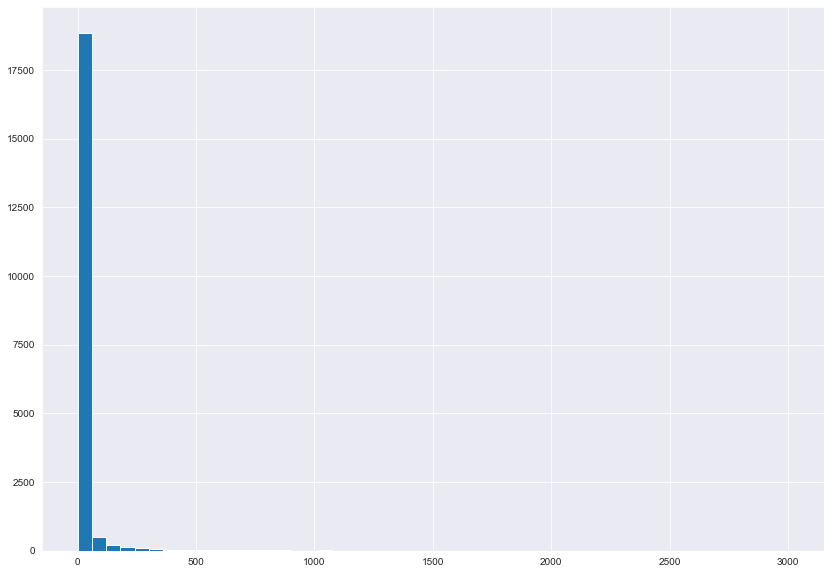

In [25]:
# creating a new figure with a specific size
plt.figure(figsize = (14, 10))

# plotting a histogram for the total reviews with 50 bins
plt.hist(recommend_df['total_reviews'], bins = 50);

In [26]:
# calculating the total amount of beers that have received over 100 reviews by consumers
over_100 = recommend_df[recommend_df['total_reviews'] > 100]['total_reviews'].count()

# calculating the percentage of rows where 'total_reviews' is greater than 100
over_100_perc = round(over_100/recommend_df['total_reviews'].count() * 100, 2)

# printing formatted statement to show the overall % of beers with over 100 reviews
print(f"The total number of beers that have over 100 reviews by consumers is {over_100_perc}% of the dataset")

The total number of beers that have over 100 reviews by consumers is 4.7% of the dataset


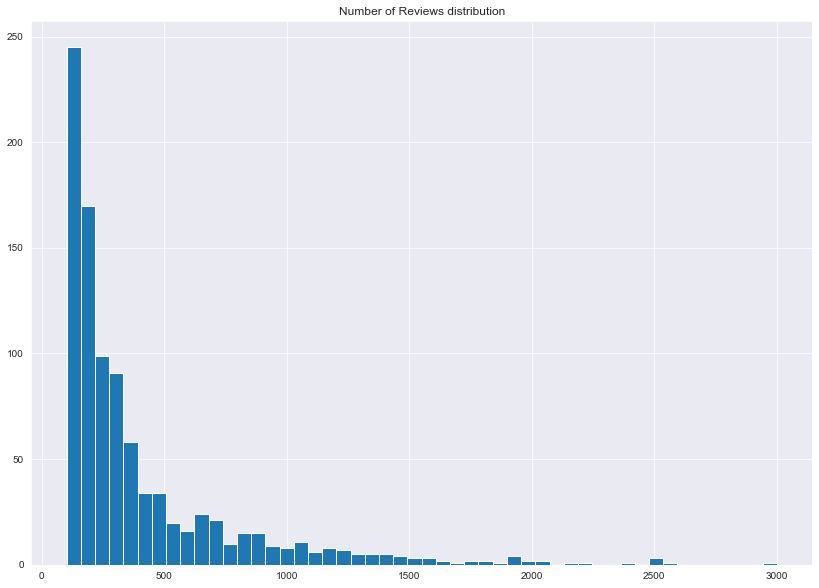

In [27]:
# creating a new figure with a specific size
plt.figure(figsize = (14, 10))

# adding a title to the histogram
plt.title('Number of Reviews distribution')

# plotting a histogram for the subset of 'total_reviews' greater than 100 with 50 bins
plt.hist(recommend_df[recommend_df['total_reviews']  > 100]['total_reviews'], bins = 50);

### Now that the data has been filtered

+ The next steps are to create a new dataframe filtering out any beer with less than 100 reviews
+ The dataframe will have beer_id, name, style, followed by review count and overall review rating
+ From there, we can calculate the average review rating by the consumer and take those beers as recommendations to my friends
+ The new dataframe will be sorted by the average review rating ascending

In [28]:
# creating a new dataframe grouped by beer_id, beer_name, beer_style calculating the count and average of reviews
filtered_review_df = df.groupby(['beer_beerId', 'beer_name', 'beer_style'])['review_overall'].agg(['count', 'mean']).reset_index()

# renaming the columns count to total_review_count and mean to avg_consumer_rating
filtered_review_df = filtered_review_df.rename({"count" : "total_review_count", "mean" : "avg_consumer_rating"}, axis = 1)

# rounding the avg_consumer_rating to the nearest 2 decimal places
filtered_review_df['avg_consumer_rating'] = round(filtered_review_df['avg_consumer_rating'], 2)

# filtering rows where total_review count is greate or equal to 100 and sorting the dataframe by avg_consumer rating descending 
filtered_review_df = filtered_review_df[filtered_review_df['total_review_count'] >= 100].sort_values(by = 'avg_consumer_rating', ascending = False)

filtered_review_df

,beer_beerId,beer_name,beer_style,total_review_count,avg_consumer_rating
8983,36316,Cantillon Bl�b�r Lambik,Lambic - Fruit,156,4.63
4279,16814,Heady Topper,American Double / Imperial IPA,469,4.63
14236,56082,Citra DIPA,American Double / Imperial IPA,252,4.63
11986,47658,Founders CBS Imperial Stout,American Double / Imperial Stout,637,4.59
1667,6368,Masala Mama India Pale Ale,American IPA,662,4.49
...,...,...,...,...,...
307,1341,Keystone Light,Light Lager,440,2.59
199,837,Coors Light,Light Lager,1157,2.58
28,111,Samuel Adams Triple Bock,American Strong Ale,604,2.36
735,2947,Keystone Ice,American Adjunct Lager,139,2.33


### Question 5: Which beer style seems to be the favourite based on the reviews written by users? How does written reviews compare to overall review score for that beer style?

#### Approach

+ Since this is focused on the reviews written, it involves using a Natural Language Processing (NLP) to understand the sentiment of the review
+ The sentiment can help better understand whether it is positive, neutral or negative
+ A suitable solution for this problem is Natural Language Tool Kit's VADER (Valence Aware Dictionary and sEntiment Reasoner)
+ [VADER](https://vadersentiment.readthedocs.io/en/latest/pages/introduction.html) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media
+ Create a function that reads the text and calculates the compound score and labels the sentiment Neutral, Positive, or Negative based on the compound score

#### What can VADER do?

+ The VADER model takes as input a text and outputs a dictionary of scores: pos, neg, neu, and compound
+ The first three are scoring the positive/negative/neutral sentiment in the text. They add up to one
+ The last, compound score is a combination of the first three. It ranges from -1 to 1

Let's see how VADER performs

In [29]:
# installing libraries for vader
import nltk

# download the lexicon
nltk.download("vader_lexicon")

# importing vader library
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

# storing the sentiment analyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chaco\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [30]:
# handling missing values in the clean column by replacing NaN with an empty string
df['review_text'] = df['review_text'].fillna('')

# converting the 'clean' column to string data type and creating a new column 'clean' in the DataFrame 'df'
df['review_text'] = pd.Series(df['review_text'], dtype = 'string')

In [31]:
# defining a function 'get_compound' to calculate sentiment scores and classify sentiments
def get_compound(df):
    
    # extracting the 'clean' text from the DataFrame
    text = df['review_text']
    
    # calculating sentiment scores using Sideways SentimentIntensityAnalyzer (sid)
    scores = sid.polarity_scores(text)
    compound = scores['compound']
    
     # assigning sentiment labels based on compound score
    sentiment = 'Neutral'
    if compound >= 0.3:
        sentiment = 'Positive'
    elif compound <= -0.3:
        sentiment = 'Negative'
        
    # ddding 'compound' and 'sentiment' columns to the DataFrame 'df'
    df['compound'] = compound
    df['sentiment'] = sentiment
    return df

# applying the 'get_compound' function to each row of the DataFrame 'df' using axis=1
df = df.apply(get_compound, axis = 1)

In [32]:
# creating a new dataframe grouped by beer_style and calculatng the mean sentiment score and count of reviews for each beer style
# also renaming the columns from compound to avg_sentiment_score, and sentiment to total count of reviews
sentiment_df = df.groupby('beer_style').agg({"compound" : "mean", "sentiment" : "count"}).reset_index().rename({"compound" : "avg_sentiment_score", "sentiment" : "total_count"}, axis = 1).sort_values(by = 'avg_sentiment_score', ascending = False)

# rounding the avg_sentiment_score to the nearest 2nd decimal
sentiment_df['avg_sentiment_score'] = round(sentiment_df['avg_sentiment_score'], 2)

# displaying the dataset
sentiment_df

,beer_style,avg_sentiment_score,total_count
86,Quadrupel (Quad),0.86,4934
38,Dortmunder / Export Lager,0.85,1809
32,Braggot,0.85,199
58,Flanders Red Ale,0.85,2858
11,American Double / Imperial Stout,0.85,23354
...,...,...,...
64,Happoshu,0.53,55
13,American Malt Liquor,0.52,1411
69,Japanese Rice Lager,0.52,496
76,Light Lager,0.47,4472


### Making sense of the work above

+ Quadrupel or Quad, has the highest sentiment from customer reviews with .86
+ Low Alcohol Beer had the worst sentiment score, making it the least favourite stylw

### What does this mean?

+ Quadrupel is the favourite style
+ It also received close 5K in reviews, which means customers were engaged

### Close Second

+ There were 4 beer styles tied for second
+ However, American Double / Imperial Stout in particular received over 20K reviews
+ American Double is over 4X the volume than the remaining three combined 

### Next Questions to answer

+ Is there a correlation between the review score and the sentiment of the review?
+ Is yes, is it a low positive or high positive correlation?
+ Build another heatmap visual to tell a story

In [33]:
# displaying first ten rows of the dataframe
df.head(10)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_year,compound,sentiment
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,2009-02-16,2009,0.1879,Neutral
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",2009-03-01,2009,0.5927,Positive
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",2009-03-01,2009,0.3021,Positive
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",2009-02-15,2009,0.9772,Positive
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",2010-12-30,2010,0.9538,Positive
5,4.7,52159,1075,Caldera Ginger Beer,Herbed / Spiced Beer,3.5,3.5,3.0,3.0,oline73,3.5,Poured from the bottle into a Chimay goblet. A...,2012-01-02,2012,0.9505,Positive
6,4.7,52159,1075,Caldera Ginger Beer,Herbed / Spiced Beer,3.5,3.5,3.5,4.0,Reidrover,4.0,"22 oz bottle from ""Lifesource"" Salem. $3.95 Ni...",2011-10-19,2011,0.9686,Positive
7,4.7,52159,1075,Caldera Ginger Beer,Herbed / Spiced Beer,3.5,2.5,3.0,2.0,alpinebryant,3.5,"Bottle says ""Malt beverage brewed with Ginger ...",2011-05-24,2011,0.9317,Positive
8,4.7,52159,1075,Caldera Ginger Beer,Herbed / Spiced Beer,3.5,3.0,4.0,3.5,LordAdmNelson,4.0,I'm not sure why I picked this up... I like gi...,2010-11-22,2010,0.7809,Positive
9,4.7,52159,1075,Caldera Ginger Beer,Herbed / Spiced Beer,5.0,3.5,4.5,4.0,augustgarage,4.0,Poured from a 22oz bomber into my Drie Fontein...,2010-09-28,2010,0.9798,Positive


In [34]:
# creating a new dataframe named heatmap_df which is the data filtered by beer style Quadrupel
heatmap_df = df[df['beer_style'] == 'Quadrupel (Quad)']

# using the .corr() function to determine the correlation between the sentiment of the review
round(heatmap_df[['compound', 'review_overall']].corr(), 2)

,compound,review_overall
compound,1.00,0.26
review_overall,0.26,1.00


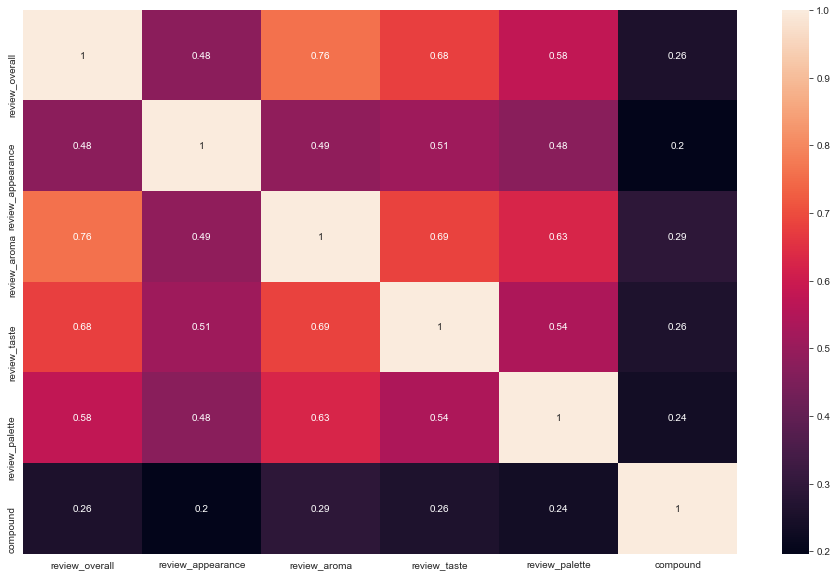

In [35]:
# creating a new figure with a size of 16 x 10
fig, ax = plt.subplots(figsize = (16, 10))

# using seaborn to create a heatmap visual to display correlations to the overall score
heatmap_sentiment = heatmap(data = heatmap_df[['review_overall', 'review_appearance', 'review_aroma', 'review_taste', 'review_palette', 'compound']].corr(), annot = True, ax = ax)

### Final Thoughts

+ In essence, the positive coefficient suggests that an increase in the compound score is associated with a higher overall review score
+ All aspects of the reviews show a similar level of correlation, hovering around 0.2
+ This aligns with expectations because a singular rating (the overall review score) more effectively captures users' sentiments about the beer than the written text does, especially when viewed through the lens of a computer
+ This is because the natural language processing model falls short of human-level understanding